<a href="https://colab.research.google.com/github/WenxuanDU/ECON441B/blob/main/HW4_IN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/econ441b/fraudTest.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df_select=df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]
     

In [7]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
dir(df_select["trans_date_trans_time"][0])
df_select["time_var"] = [i.hour for i in df_select["trans_date_trans_time"]]
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
   

<ipython-input-7-ff4804780a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-7-ff4804780a5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.hour for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [10]:
ros = RandomOverSampler(random_state = 0)
ros.fit_resample(X_train,y_train)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train,y_train)

In [11]:
rus=RandomUnderSampler(random_state=0)
rus.fit_resample(X_train,y_train)
X_resampled_rus, y_resampled_rus=rus.fit_resample(X_train,y_train)

In [12]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_resampled_smote, y_resampled_smote=oversample.fit_resample(X_train,y_train)

# 3.) Train three logistic regression models 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
over_log=LogisticRegression()
over_log.fit(X_resampled_ros,y_resampled_ros)

LogisticRegression()

In [15]:
under_log=LogisticRegression()
under_log.fit(X_resampled_rus,y_resampled_rus)

LogisticRegression()

In [16]:
smote_log=LogisticRegression()
smote_log.fit(X_resampled_smote,y_resampled_smote)

LogisticRegression()

# 4.) Test the three models

In [21]:
#oversample model
y_pred_ros=over_log.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ros))
print("Accuracy:", accuracy_score(y_test, y_pred_ros))

Confusion Matrix:
[[134197  31875]
 [   155    489]]
Accuracy: 0.8078768684469397


In [22]:
#undersample model
y_pred_rus=under_log.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rus))
print("Accuracy:", accuracy_score(y_test, y_pred_rus))

Confusion Matrix:
[[136344  29728]
 [   162    482]]
Accuracy: 0.8207130689315962


In [23]:
#smote model
y_pred_smote=smote_log.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_smote))

Confusion Matrix:
[[136014  30058]
 [   162    482]]
Accuracy: 0.818733654838168


# 5.) Which performed best in Out of Sample metrics?


Oversample model is the best because it has the highest test score.

# 6.) Pick two features and plot the two classes before and after SMOTE.

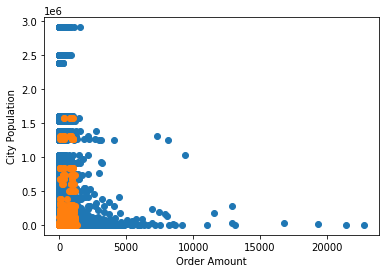

In [24]:
#Before SMOTE
OG_data_temp=pd.concat([X_train,y_train],axis=1)
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==0]['amt'],OG_data_temp[OG_data_temp['is_fraud']==0]['city_pop'])
plt.scatter(OG_data_temp[OG_data_temp['is_fraud']==1]['amt'],OG_data_temp[OG_data_temp['is_fraud']==1]['city_pop'])
plt.xlabel('Order Amount')
plt.ylabel('City Population')
plt.show()

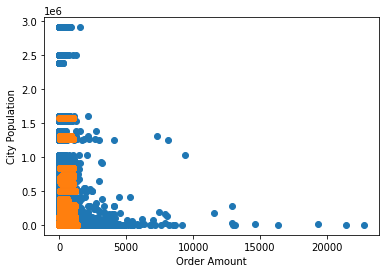

In [25]:
#After SMOTE
OG_data_temp_smote=pd.concat([X_resampled_smote,y_resampled_smote],axis=1)
plt.scatter(OG_data_temp_smote[OG_data_temp_smote['is_fraud']==0]['amt'],OG_data_temp_smote[OG_data_temp_smote['is_fraud']==0]['city_pop'])
plt.scatter(OG_data_temp_smote[OG_data_temp_smote['is_fraud']==1]['amt'],OG_data_temp_smote[OG_data_temp_smote['is_fraud']==1]['city_pop'])
plt.xlabel('Order Amount')
plt.ylabel('City Population')
plt.show()